# Filtrage par machine learning grâce à la base de données ImageNet


## Chargement de la base de données
On prend la base de données ImageNet dont les images seront nos sorties.
https://www.youtube.com/watch?v=b6LgMlTZtMM&ab_channel=Packt 

In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
import tensorflow_datasets as tfds

# Helper libraries
import os
import numpy as np
import matplotlib.pyplot as plt
import pickle


c:\Users\flore\AppData\Local\Programs\Python\Python39\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Séparation de la ds en training, testing and validation ds

In [2]:
def unpickle(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo)
    return dict

In [3]:
#ds1 = unpickle('train_data_batch_1')

KeyboardInterrupt: 

In [4]:
ds1 = unpickle('val_data')

In [5]:
def load_databatch(d, img_size=64):

    #d = unpickle('train_data_batch_1')
    x = d['data'][0:2000]
    y = d['labels'][0:2000]
    #mean_image = d['mean'][0:2000]


    x = x/np.float32(255)
    #mean_image = mean_image/np.float32(255)

    # Labels are indexed from 1, shift it so that indexes start at 0
    y = [i-1 for i in y]
    data_size = x.shape[0]

    #x -= mean_image

    img_size2 = img_size * img_size

    x = np.dstack((x[:, :img_size2], x[:, img_size2:2*img_size2], x[:, 2*img_size2:]))
    x = x.reshape((x.shape[0], img_size, img_size, 3)).transpose(0, 3, 1, 2)

    X_train = x[0:data_size, :, :, :]
    Y_train = y[0:data_size]
    X_train_flip = X_train[:, :, :, ::-1]
    Y_train_flip = Y_train
    X_train = np.concatenate((X_train, X_train_flip), axis=0)
    Y_train = np.concatenate((Y_train, Y_train_flip), axis=0)
    
    print('Train data shape: ', X_train.shape)


    return dict(
        X_train=X_train,
        Y_train=Y_train
        #mean_image=mean_image
    )

In [6]:
train_batch = load_databatch(ds1)

Train data shape:  (4000, 3, 64, 64)


[[[0.11372549 0.10980392 0.10196079]
  [0.05882353 0.05882353 0.06666667]
  [0.07058824 0.07843138 0.08627451]
  ...
  [0.09019608 0.08235294 0.05098039]
  [0.04705882 0.0627451  0.05098039]
  [0.03921569 0.03921569 0.03529412]]

 [[0.21960784 0.22745098 0.08627451]
  [0.04705882 0.07450981 0.07843138]
  [0.08627451 0.09803922 0.09411765]
  ...
  [0.10980392 0.10588235 0.09411765]
  [0.08627451 0.07843138 0.07450981]
  [0.06666667 0.24705882 0.28627452]]

 [[0.25882354 0.25882354 0.25490198]
  [0.1764706  0.09411765 0.10588235]
  [0.12156863 0.11764706 0.12156863]
  ...
  [0.1254902  0.11764706 0.10588235]
  [0.10980392 0.09803922 0.09411765]
  [0.05490196 0.02745098 0.02352941]]

 ...

 [[0.11764706 0.14509805 0.42745098]
  [0.54901963 0.3137255  0.20784314]
  [0.32156864 0.33333334 0.30588236]
  ...
  [0.08235294 0.22352941 0.43137255]
  [0.38039216 0.35686275 0.3764706 ]
  [0.34901962 0.3254902  0.3019608 ]]

 [[0.09803922 0.40784314 0.5176471 ]
  [0.4745098  0.5176471  0.3529412 ]


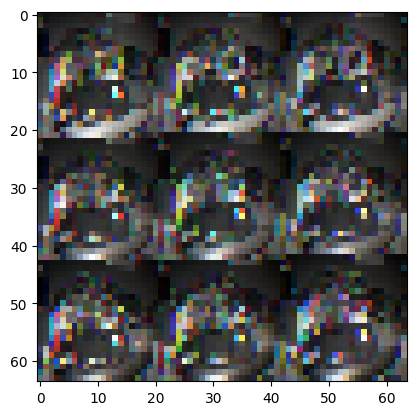

In [7]:
img1 = train_batch['X_train'][50]
img1 = np.reshape(img1, (64, 64, 3))
plt.imshow(img1)
print(img1)

## Création des images d'entrée
On leur applique un filtre sepia pour obtenir nos images d'entrée. 

## Charger le CNN Resnet

## Entrainer le CNN

## Afficher les résultats

## Regarder la variation des différentes chaînes

Idée: faire des stats sur la variation des histogramme de chaque chaîne